In [1]:
import numpy as np
import pyspiel
from open_spiel.python.egt.utils import game_payoffs_array

## 1. Creating New games


If the function definition is not clear, we can use `__doc__` to check the docstring for some potential help(if the documentation is completed)

If the functions exposed to use is unknown, using `dir()` to get all the names defined under one specific module

In [ ]:
print(pyspiel.create_matrix_game.__doc__)

In [ ]:
print(dir(pyspiel.MatrixGame))

Here, we use `create_matrix_game()` to create games with payoff matrices

In [2]:

"""rock-paper-scissors"""
payoff1 = np.array([[0, -0.05, 0.25], [0.05, 0, -0.5], [-0.25, 0.5, 0]])
payoff2 = -payoff1
rps_game = pyspiel.create_matrix_game(payoff1, payoff2)
rps_p_mat = game_payoffs_array(rps_game)

"""Subsidy game"""
payoff1 = np.array([[12, 0], [11, 10]])
payoff2 = np.array([[12, 11], [0, 10]])
sub_game = pyspiel.create_matrix_game(payoff1, payoff2)
sub_p_mat = game_payoffs_array(sub_game)

"""Battle of Sexes"""
payoff1 = np.array([[3, 0], [0, 2]])
payoff2 = np.array([[2, 0], [0, 3]])
sex_game = pyspiel.create_matrix_game(payoff1, payoff2)
sex_p_mat = game_payoffs_array(sex_game)

"""Prisoners Dilemma"""
payoff1 = np.array([[-1, -4], [0, -3]])
payoff2 = np.array([[-1, 0], [-4, -3]])
pd_game = pyspiel.create_matrix_game(payoff1, payoff2)
pd_p_mat = game_payoffs_array(pd_game)

### 1.1 Nash Equilibrium
Using `lemke_howson_solve` functions given by open_spiel along with hand calculation to give the NE for each game.
This function is not guaranteed to return all NE and correct NE. Therefore, we have to proofread it with hand-calculated results

In [28]:
from open_spiel.python.algorithms.matrix_nash import lemke_howson_solve

In [27]:
def nash_equilibrium(p_mat):
    """
    Calculate and print NE based on the built-in function
    """
    nash = lemke_howson_solve(p_mat[0], p_mat[1])
    for v in nash:
        print(v)

#### Rock paper Scissors
The function returns the correct and the only NE for this game. It's not a strict NE since it's a mixed-strategy NE(no explicit preference on any of the supporting actions).

In [28]:
nash_equilibrium(rps_p_mat)

(array([0.625 , 0.3125, 0.0625]), array([0.625 , 0.3125, 0.0625]))
(array([0.625 , 0.3125, 0.0625]), array([0.625 , 0.3125, 0.0625]))
(array([0.625 , 0.3125, 0.0625]), array([0.625 , 0.3125, 0.0625]))
(array([0.625 , 0.3125, 0.0625]), array([0.625 , 0.3125, 0.0625]))
(array([0.625 , 0.3125, 0.0625]), array([0.625 , 0.3125, 0.0625]))
(array([0.625 , 0.3125, 0.0625]), array([0.625 , 0.3125, 0.0625]))


#### Subsidy Game
It only shows the pure-strategy NE this time. But there is still another mix-strategy NE: $([\frac{10}{11}, \frac{1}{11}], [\frac{10}{11}, \frac{1}{11}])$

Among these two pure-strategy NEs, which are also strict NEs, one Pareto dominates the other --> $(12,12) > (10,10)$ 

To be specific, **Both choosing subsidy 1** is the **Pareto Optimal Equilibrium** in this game. In the contrary, **both choosing subsidy 2** is the suboptimal points. By incorporating leniency into the learning process, we can avoid ending up with suboptimal solutions.

Attention: why don't we have to worry about ending up with the mixed NE, which is also suboptimal?
The reason is that, it's not **Evolutionary Stable Strategy(ESS)**. I'm still not entirely clear on this concept, but I believe I have a basic understanding of it. ESS suggests that if there's an unexpected deviation from the strategy, pushing us slightly away from the Nash Equilibrium (NE), the strategy will eventually return to the same NE. This will become clear once we examine the dynamics.

In [29]:
nash_equilibrium(sub_p_mat)

(array([1., 0.]), array([1., 0.]))
(array([0., 1.]), array([0., 1.]))
(array([1., 0.]), array([1., 0.]))
(array([0., 1.]), array([0., 1.]))


#### Battle of the Sexes
Still, the function only gives pure-strategy NE. However, there is  another mixed-strategy NE: $([\frac{3}{5}, \frac{2}{5}], [\frac{2}{5}, \frac{3}{5}])$

However, in this game, there's no **Pareto Optimal Equilibrium**, since no NE Pareto dominates all the others. 

In [30]:
nash_equilibrium(sex_p_mat)

(array([1., 0.]), array([1., 0.]))
(array([0., 1.]), array([0., 1.]))
(array([1., 0.]), array([1., 0.]))
(array([0., 1.]), array([0., 1.]))


#### Prisoners Dilemma
The result is correct. The two prisoner will both choose to defect. However, this choice is apparently not the best(the result can be better if they both cooperate) and thus called the dilemma

In [31]:
nash_equilibrium(pd_p_mat)

(array([0., 1.]), array([0., 1.]))
(array([0., 1.]), array([0., 1.]))
(array([0., 1.]), array([0., 1.]))
(array([0., 1.]), array([0., 1.]))


## 2. Learning Dynamics
### 2.1 Replicator Dynamics
Plot of replicator dynamics is easy here. But we shall use different classes to plot the result based on the number of actions and so on.
By combining replicator dynamics, we can gain better understanding of concepts like SEE.

In [8]:
from open_spiel.python.egt import dynamics
from open_spiel.python.egt import visualization
import matplotlib.pyplot as plt

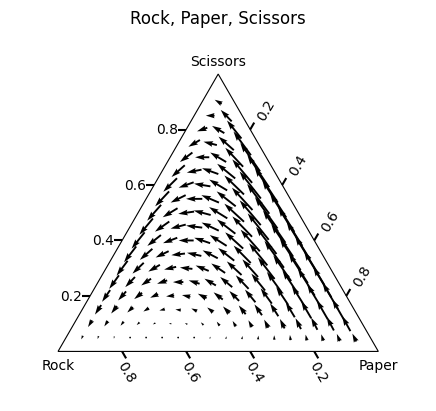

In [33]:
# replicator dynamics of rock-paper-scissors
# It's 3x3 actions, and is a symmetric game, therefore we use SinglePopulationDynamics.
# SinglePopulationDynamics plots dynamics of self-play.
dyn = dynamics.SinglePopulationDynamics(rps_p_mat, dynamics.replicator)
# such projection is defined inside of visualization package
ax = plt.subplot(projection="3x3")
ax.quiver(dyn)
# set labels
ax.set_labels(["Rock", "Paper", "Scissors"])
plt.title("Rock, Paper, Scissors")
plt.show()

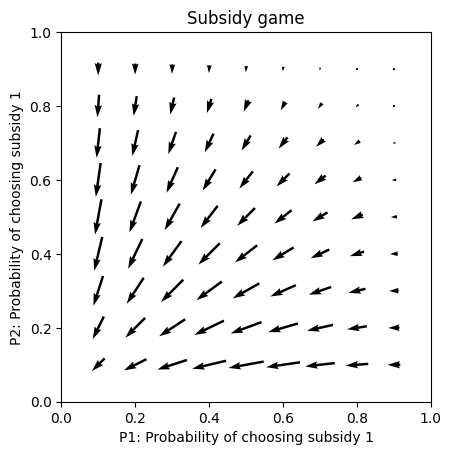

In [32]:
# replicator dynamics of subsidy game
dyn = dynamics.MultiPopulationDynamics(sub_p_mat, dynamics.replicator)
# Then plot
ax = plt.subplot(projection="2x2")
ax.quiver(dyn)

plt.xlabel("P1: Probability of choosing subsidy 1")
plt.ylabel("P2: Probability of choosing subsidy 1")
plt.title("Subsidy game")
plt.show()

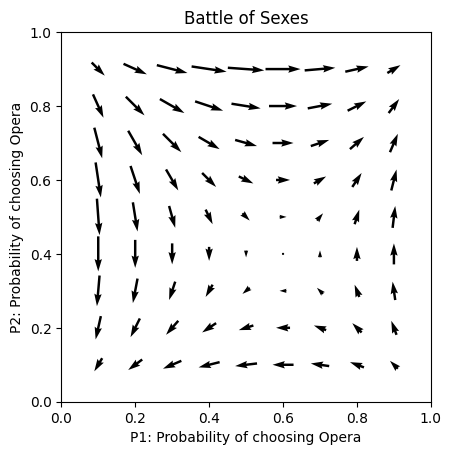

In [35]:
# replicator dynamics of Battle of Sexes
dyn = dynamics.MultiPopulationDynamics(sex_p_mat, dynamics.replicator)
# Then plot
ax = plt.subplot(projection="2x2")
ax.quiver(dyn)

plt.xlabel("P1: Probability of choosing Opera")
plt.ylabel("P2: Probability of choosing Opera")
plt.title("Battle of Sexes")
plt.show()

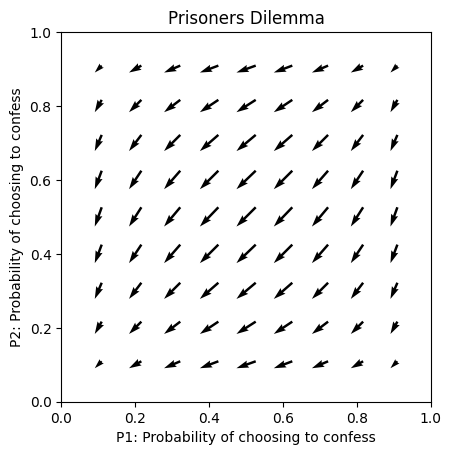

In [36]:
# replicator dynamics of Prisoners Dilemma
dyn = dynamics.MultiPopulationDynamics(pd_p_mat, dynamics.replicator)
# Then plot
ax = plt.subplot(projection="2x2")
ax.quiver(dyn)

plt.xlabel("P1: Probability of choosing to confess")
plt.ylabel("P2: Probability of choosing to confess")
plt.title("Prisoners Dilemma")
plt.show()

### 2.2 Lenient Boltzmann Q-Learning Dynamics
We implemented our own classes to plot this. They always uses boltzmann dynamics and expose two more parameters for adjustment: `K:leniency; T:temperature` 


In [30]:
import lenient_dynamics as ld  # package that implements LBQ

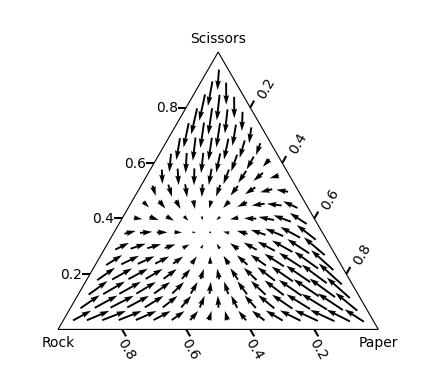

In [38]:
dyn = ld.LBQSinglePopulationDynamics(rps_p_mat, K=1, T=1)
ax = plt.subplot(projection="3x3")
ax.quiver(dyn)
ax.set_labels(["Rock", "Paper", "Scissors"])
plt.show()

params explanation: 
- K=1: no leniency is added
- T=1: Adding significant exploration into the strategy

Since the introduction of exploration mechanism, SSE here no longer aligns with any NE. Significant exploration rate causes each player's policy to be close to the center(where each action are equally likely to be chosen), thus pushing the SEE also to the center: This is a reasonable choice, as when we observe that our opponent chooses their action randomly, the best strategy for us is also to randomly pick one. The biased payoff has minor impact in this case.


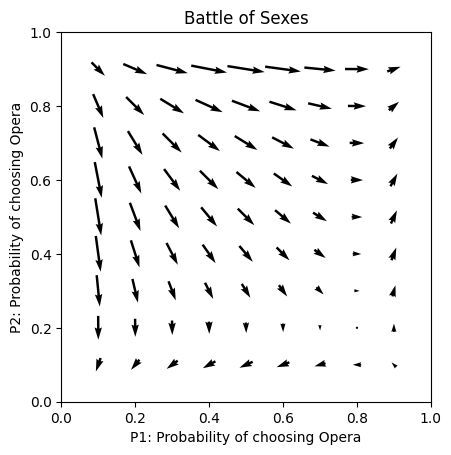

In [39]:
dyn = ld.LBQTwoPopulationDynamics(sex_p_mat, K=5, T=0.001)
ax = plt.subplot(projection="2x2")
ax.quiver(dyn)
plt.xlabel("P1: Probability of choosing Opera")
plt.ylabel("P2: Probability of choosing Opera")
plt.title("Battle of Sexes")
plt.show()

params explanation: 
- K=5: significant leniency
- T=0.01: Nearly equals to no exploration

the impact of K is it will bias the gradient towards the action that has the highest best possible payoff. The benefits of it may not clear in this game. In fact, leniency is often used to help escaping from suboptimal solutions in **Cooperative Games**. Accordingly, we can examine it in subsidy game.



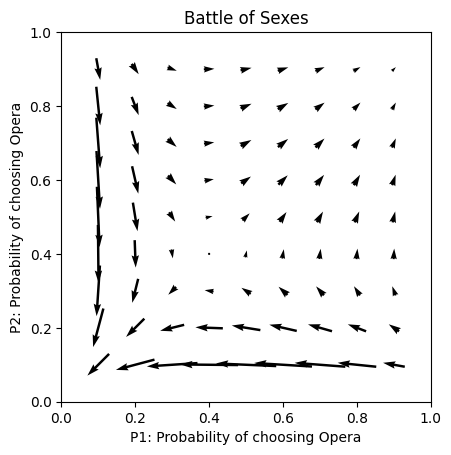

In [33]:
dyn = ld.LBQTwoPopulationDynamics(sub_p_mat, K=5, T=0.001)
ax = plt.subplot(projection="2x2")
ax.quiver(dyn)
plt.xlabel("P1: Probability of choosing Opera")
plt.ylabel("P2: Probability of choosing Opera")
plt.title("Battle of Sexes")
plt.show()

In this dynamics, we observe that the region flowing towards the Pareto optimum is significantly larger.
We can describe this phenomenon formally by refering to the paper (D. Bloembergen, M. Kaisers, and K. Tuyls. Lenient frequency adjusted Q-learning. In Proc. of 22nd Belgium-Netherlands Conf. on Artif. Intel., 2010)

## 3.RL learning
### 3.1 Template provided by open_spiel
The template is a self-learning Q learning agent playing Tic-Tac-Toe game.
We can skip this if how to training q-learner is already clear.

In [ ]:
# little test about what .num_distinct_actions() would return
test_game = pyspiel.create_matrix_game([[1, 1, 1], [2, 2, 2]], [[1, 1, 1], [2, 2, 2]])
print(test_game.num_distinct_actions())
print(test_game.num_rows())
print(test_game.num_cols())

"""
Analysis:
    different actions of one player are indicated by different numbers
    Here, for row player, the number of action is : 0, 1
    for col player: 0, 1, 2
    So there are 3 distinct actions(0,1,2)?
"""

In [ ]:
# Let's do independent Q-learning in Tic-Tac-Toe, and play it against random.
# RL is based on python/examples/independent_tabular_qlearning.py
from open_spiel.python import rl_environment
from open_spiel.python import rl_tools
from open_spiel.python.algorithms import tabular_qlearner

# Create the environment - by indicating the name of built-in game
# One can also create his own game and pass it in
env = rl_environment.Environment("tic_tac_toe")
num_players = env.num_players
num_actions = env.action_spec()["num_actions"]
print(num_actions)
# Create the agents
agents = [
    tabular_qlearner.QLearner(player_id=idx, num_actions=num_actions)
    for idx in range(num_players)
]
"""
Self-play means that two agents use the same algorithm to learn against each other
"""

In [ ]:
# Train the Q-learning agents in self-play.
for cur_episode in range(25000):
    if cur_episode % 1000 == 0:
        print(f"Episodes: {cur_episode}")
    time_step = env.reset()
    while not time_step.last():
        player_id = time_step.observations["current_player"]
        # Here, since the game is round based, every agent has a unique id from 0 - (n-1)
        # The agent chooses an appropriate action based on the current state
        agent_output = agents[player_id].step(time_step)
        time_step = env.step([agent_output.action])
    # Episode is over, step all agents with final info state.
    for agent in agents:
        agent.step(time_step)
print("Done!")

In [ ]:
# Evaluate the Q-learning agent against a random agent.
from open_spiel.python.algorithms import random_agent

eval_agents = [agents[0], random_agent.RandomAgent(1, num_actions, "Entropy Master 2000")]

time_step = env.reset()
while not time_step.last():
    print("")
    print(env.get_state)
    player_id = time_step.observations["current_player"]
    # Note the evaluation flag. A Q-learner will set epsilon=0 here.
    agent_output = eval_agents[player_id].step(time_step, is_evaluation=True)
    print(f"Agent {player_id} chooses {env.get_state.action_to_string(agent_output.action)}")
    time_step = env.step([agent_output.action])

print("")
print(env.get_state)
print(time_step.rewards)


### 3.2 Applying Q-learner on Matrix Games
Here's some experiment for understanding source code and its logic.

In [44]:
game_type = rps_game.get_type()
print(game_type)
"""
Different dynamics:
    round base:
        SEQUENTIAL
        MEAN_FIELD
    
    simultaneous:
        SIMULTANEOUS
"""
print(f"Round type: {game_type.dynamics}")

"""
Information state includes current observation and the part of the history of the game, whereas observation doesn't have such memory of history.
However, in our matrix game, there is no state transition so that these two concept are equally useful.
"""
print(f"Provide observation tensor?: {game_type.provides_observation_tensor}")
print(f"Provide Information state tensor?: {game_type.provides_information_state_tensor}")

<GameType 'short_name'>
Round type: Dynamics.SIMULTANEOUS
Provide observation tensor?: True
Provide Information state tensor?: True


In [45]:
# experiment of observation tensor
game = pyspiel.load_game("tic_tac_toe")
state = game.new_initial_state()
state.apply_action(4)  # Middle
state.apply_action(2)  # Top-right
state.apply_action(0)
state.apply_action(1)

# Player 0's turn.
shape = game.observation_tensor_shape()
print(state.observation_tensor())
print(state.observation_tensor(0))

# First dimension interpreted as selecting from 2D planes of { empty, O, X }.
print(np.reshape(np.asarray(state.observation_tensor()), shape))

print(f"Observation string:\n{state.observation_string()}")
"""
In tic-tac-toe game, the observation is the current game state, which consists of:
    1. which position is occupied
    2. which position is occupied by which player

Observation string integrate the information visually
"""



[0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
[[[0. 0. 0.]
  [1. 0. 1.]
  [1. 1. 1.]]

 [[0. 1. 1.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[1. 0. 0.]
  [0. 1. 0.]
  [0. 0. 0.]]]
Observation string:
xoo
.x.
...


'\nIn tic-tac-toe game, the observation is the current game state, which consists of:\n    1. which position is occupied\n    2. which position is occupied by which player\n\nObservation string integrate the information visually\n'

### 3.2.1 ε-greedy Q-learning with Trajectory
We first put our eyes on ε-greedy Q learning, with constant ε value. We can try other ε value schedule later by using the scheduler under `open_spiel.python.rl_tools`

For convenience, I built some useful functions for learning and drawing trajectory.

In [12]:
from open_spiel.python import rl_environment
from open_spiel.python import rl_tools
from open_spiel.python.algorithms import tabular_qlearner
from open_spiel.python.egt import dynamics
from open_spiel.python import rl_agent
from open_spiel.python.egt import visualization
import lenient_dynamics
import matplotlib.pyplot as plt
import collections

In [35]:
# a small return type definition(learnt from source code)
LearningTrajectories = collections.namedtuple("learning_trajectories", ["player1", "player2"])


def qlearning(
        game: pyspiel.MatrixGame,
        learner: rl_agent.AbstractAgent,
        episodes: int = 100,
        **kwargs
) -> LearningTrajectories:
    """
    Train self-play agents with epsilon greedy q-learning algorithm on the given matrix game
    
    :param game: A matrix game to be played(Simultaneous move, general form game)
    :param learner: Q learner 
    :param episodes: Number of episodes(number of complete game to go through)
    :param kwargs: Keyword arguments for learner construction
    :return: LearningTrajectory of two players
    """

    """environment creation & agents creation"""
    env = rl_environment.Environment(game)
    num_players = env.num_players
    num_actions = env.action_spec()["num_actions"]
    # Create the agents
    agents = [
        learner(
            player_id=idx,
            num_actions=num_actions,
            **kwargs
        )
        for idx in range(num_players)
    ]

    """Train the Q-learning agents in self-play."""
    policy_change = [[], []]
    # Train by finishing 100 complete games
    for cur_episode in range(episodes):
        if cur_episode % 1000 == 0:
            print(f"Episodes: {cur_episode}")

        # reset the game
        time_step = env.reset()
        """
            We didn't use evaluation mode to get probability because of the following reasons::
                1. In evaluation mode, it will always return the optimal action, which is normally a pure strategy
                2. In the learning process, the policy one agent use is the mixed policy with the probability distribution calculated by applying exploration mechanism on Q-values of the current state. Therefore, it's more reasonable to use this one rather than the one got in evaluation mode.
        """
        while not time_step.last():
            joint_actions = []
            # In a matrix game, agents simultaneously pick up one action and get reward based on the joint action
            idx = 0
            for agent in agents:
                agent_output = agent.step(time_step)
                joint_actions.append(
                    agent_output.action)  # chosen action & probability distribution over action under current exploration method 
                policy_change[idx].append(agent_output.probs)
                idx += 1
            time_step = env.step(joint_actions)
        # Episode is over, step all agents with final info state.
        # In matrix games, this is the place and the only place where the Q value is updated
        for agent in agents:
            agent.step(time_step)

    print("Done!")
    return LearningTrajectories(player1=policy_change[0], player2=policy_change[1])



In [21]:
def learning_trajectory(p_mat: np.ndarray, dyns, lts: LearningTrajectories = None, labels: list = None,
                        title: str = None, marker=None, **kwargs):
    """
    Plotting trajectory on a learning dynamics plot
    
    :param p_mat: payoff-matrix of the game.
    :param dyns: Population dynamics used to sample points and calculate learning dynamics.
    :param lts: learning trajectory
    :param labels: labels for plot
    :param title: title for plot
    :param marker: marker for plot
    :param kwargs: other parameters passed to the dyns
    :return: 
    """
    if p_mat.shape[1] == 3:
        assert labels is None or len(labels) == 3
        assert np.asarray(lts.player1).shape[1] == 3
        assert issubclass(dyns, dynamics.SinglePopulationDynamics)
        dyn = dyns(p_mat, **kwargs)
        ax = plt.subplot(projection="3x3")
        ax.quiver(dyn)
        ax.plot(lts.player1, marker=marker)
        ax.set_labels(labels)
        plt.title(title)
        plt.show()
    else:
        assert labels is None or len(labels) == 2
        assert np.asarray(lts.player1).shape[1] == 2
        assert issubclass(dyns, dynamics.MultiPopulationDynamics)
        lts = np.stack([np.array(lts.player1)[:, 0], np.array(lts.player2)[:, 0]]).T
        dyn = dyns(p_mat, **kwargs)
        ax = plt.subplot(projection="2x2")
        ax.quiver(dyn)
        ax.plot(lts[:, 0], lts[:, 1], marker=marker)
        if labels is not None:
            plt.xlabel(labels[0])
            plt.ylabel(labels[1])
        plt.title(title)
        plt.show()



In [16]:
# place for tuning parameters
epsilon_args = {
    "step_size": 0.1,
    "epsilon_schedule": rl_tools.ConstantSchedule(0.2),
    "discount_factor": 1.0
}

In [22]:
"""Learning"""
lts = qlearning(rps_game, tabular_qlearner.QLearner, **epsilon_args)

Episodes: 0
Done!


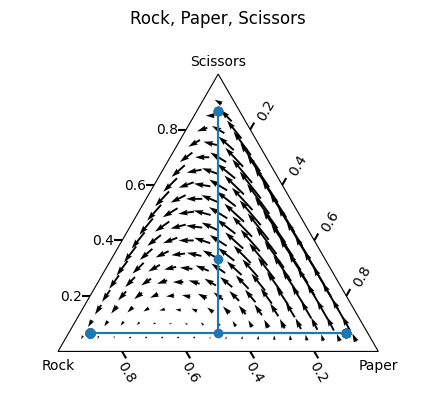

In [23]:
"""Plotting"""

learning_trajectory(rps_p_mat, dynamics.SinglePopulationDynamics,
                    lts=lts,
                    labels=["Rock", "Paper", "Scissors"],
                    title="Rock, Paper, Scissors",
                    marker='o',
                    dynamics=dynamics.replicator,
                    )

In [24]:
lts = qlearning(sex_game, tabular_qlearner.QLearner, episodes=15000, step_size=0.05, discount_factor=0.9,
                epsilon_schedule=rl_tools.ConstantSchedule(0.7))

Episodes: 0
Episodes: 1000
Episodes: 2000
Episodes: 3000
Episodes: 4000
Episodes: 5000
Episodes: 6000
Episodes: 7000
Episodes: 8000
Episodes: 9000
Episodes: 10000
Episodes: 11000
Episodes: 12000
Episodes: 13000
Episodes: 14000
Done!


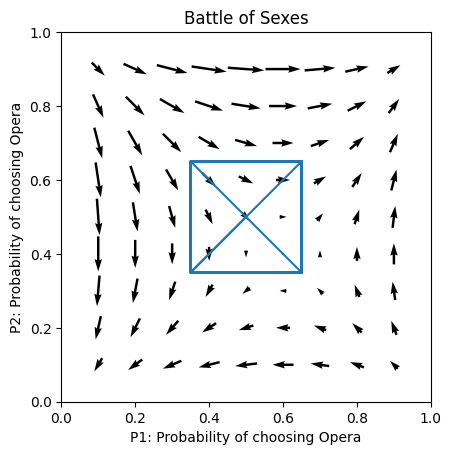

In [25]:
# perhaps we can add the final pure strategy as the final strategy? Maybe not.
learning_trajectory(sex_p_mat, dynamics.MultiPopulationDynamics,
                    lts=lts,
                    labels=["P1: Probability of choosing Opera", "P2: Probability of choosing Opera"],
                    title="Battle of Sexes",
                    dynamics = dynamics.replicator
                    )

In this case, we set the exploration rate larger than 0.5 to see what would happen.

You may have these questions with this graph:
- Why does it look like that there are only 5 points
- Why are these points so close to the center or, in other words, far away from the corners

To explain these, we first need to understand the concept of these exploration mechanisms. The exploration mechanism can also be seen as **policy generation** methods. The reason behinds it is that, when we do q-learning on a specific tasks, we are actually doing **value iteration** rather than **policy iteration** during the learning process. As a result, there should be no policy in between. Exploration mechanisms like epsilon-greedy, on the one hand, decide which action to be examined in the next iteration; on the other hand, also determines the policy the agent uses based on current q value, which is also exposed as part of the environment to the other agents. In a nutshell, the exploration mechanism decides the set of polices we can generate. In the case of epsilon-greedy, there's only five: 
    1. $(0.5,0.5)$ when it has no preference on one specific action
    2. $(1-\frac{ε}{2}, \frac{ε}{2})$ when it prefers the first action
    3. $(\frac{ε}{2}, 1-\frac{ε}{2})$ when it prefers the second action

It's not hard to proof, since it's just a simple calculation task based on epsilon-greedy.


This also helps me explain the reason why i used the 'raw output' as the policy to plot on the trajectory.

### 3.2.2 LFAQ with Trajectory

Compared to normal lenient boltzmann Q learner model, LFAQ complies more tightly with the learning trajectory. Accordingly, we use LFAQ to show the learning trajectory which is then compared with the expected dynamics.

LFAQ divides the 'update' part of the Q-learning formula by the probability of choosing this action under current policy, thus aligning with the expected derivatives based on evolutionary game theory. (see paper: Frequency Adjusted Multi-agent Q-learning, M. Kaisers and K. Tuyls, Proc. of 9th Int. Conf. on Autonomous Agents and Multiagent Systems (AAMAS 2010))

The LFAQ we used here is the generalized version from the paper, which divides the step_size into two parts(a, b). The formula is:
$$
Q_{i}(t+1) \text{ \overleftarrow{} } Q_{i}(t) + min(\frac{\beta}{x_i},1)\cdot\alpha(r_i(t) + \gamma\underset{j}{\operatorname{argmax}}Q_j(t) - Q_i(t))
$$


In [6]:
import lenient_qlearner

# parameters for LFAQ.
LFAQ_args = {
    'step_size_a': 0.05,  # learning rate: α for FAQ
    'step_size_b': 0.001,  # β for FAQ
    'temperature_schedule': rl_tools.ConstantSchedule(0.2), # temperature
    'K': 3,  # Leniency
    'discount_factor': 1.0, # discount
}

In [26]:
# the episode number is large since the step is small in order to approximate infinitesimal time step.
lts = qlearning(sex_game, lenient_qlearner.LFAQlearner, episodes=150000, **LFAQ_args)

Episodes: 0
Episodes: 1000
Episodes: 2000
Episodes: 3000
Episodes: 4000
Episodes: 5000
Episodes: 6000
Episodes: 7000
Episodes: 8000
Episodes: 9000
Episodes: 10000
Episodes: 11000
Episodes: 12000
Episodes: 13000
Episodes: 14000
Episodes: 15000
Episodes: 16000
Episodes: 17000
Episodes: 18000
Episodes: 19000
Episodes: 20000
Episodes: 21000
Episodes: 22000
Episodes: 23000
Episodes: 24000
Episodes: 25000
Episodes: 26000
Episodes: 27000
Episodes: 28000
Episodes: 29000
Episodes: 30000
Episodes: 31000
Episodes: 32000
Episodes: 33000
Episodes: 34000
Episodes: 35000
Episodes: 36000
Episodes: 37000
Episodes: 38000
Episodes: 39000
Episodes: 40000
Episodes: 41000
Episodes: 42000
Episodes: 43000
Episodes: 44000
Episodes: 45000
Episodes: 46000
Episodes: 47000
Episodes: 48000
Episodes: 49000
Episodes: 50000
Episodes: 51000
Episodes: 52000
Episodes: 53000
Episodes: 54000
Episodes: 55000
Episodes: 56000
Episodes: 57000
Episodes: 58000
Episodes: 59000
Episodes: 60000
Episodes: 61000
Episodes: 62000
Episo

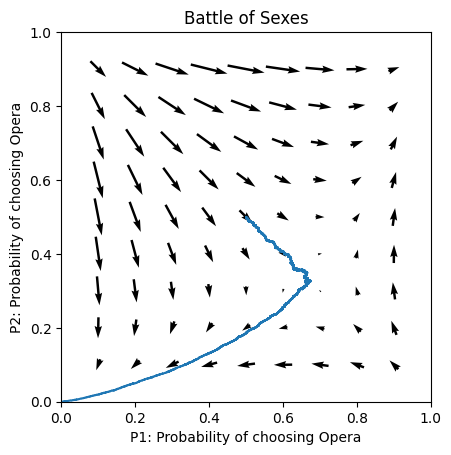

In [27]:
learning_trajectory(sex_p_mat, lenient_dynamics.LBQTwoPopulationDynamics,
                    lts=lts,
                    labels=["P1: Probability of choosing Opera", "P2: Probability of choosing Opera"],
                    title="Battle of Sexes",
                    # below are parameters for LBQTwoPopulationDynamics
                    K = 3,
                    T = 0.2,
                    )

Here, we directly use the expected learning dynamics biased by the sam K and T parameter. We observe that the learning trajectory complies pretty well with the learning dynamics.
Unlike $\epsilon-greedy$, the nature of boltzmann allows us to generate more fine-grained policies.

#### TODO
If possible, we can also incorporate the current function with the functionality to set the initial Q-value(thus the initial policy) and see what would happen. The is useful especially for cooperative games, like subsidy game, to show how the introduction of leniency could help to avoid falling into suboptimal solutions.

The paper(https://www.researchgate.net/publication/221454203_Frequency_adjusted_multiagent_Q-learning) gives some candidate initial points, but I have no idea what it does.